## plot spatial ACC pattern of DPLE

In [1]:
import matplotlib.colors as colors
from matplotlib import cm,gridspec,rc
import matplotlib.pyplot as plt
import os
import utils
import warnings
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xarray as xr
import corrstats
warnings.filterwarnings('ignore')

# Model Grid for region mask to remove values that are not good

In [2]:
USER = os.environ['USER']

In [3]:
path = f'/glade/u/home/{USER}/O2prediction/Prediction/notebooks/data'
filename = f'{path}/grid-data-POP_gx1v6.nc'
grid = xr.open_dataset(filename)
region_mask = grid['REGION_MASK']
#lon = grid.coords['TLONG']
#lat = grid.coords['TLAT']

In [4]:
path = f'/glade/work/{USER}/MAPP/ETOPO'
filename = f'{path}/Etopo1_Bed_0_65N_170E_40W.nc'
bathy = xr.open_dataset(filename)
lon_e = bathy['lon']
for ii in range(len(lon_e)):
    if lon_e[ii] > 0:
        lon_e[ii] = lon_e[ii] - 360.
lat_e = bathy['lat'][300:]
depth_e = bathy['depth'][300:, :]

In [5]:
mask_bathy = (depth_e >= 0.)*1.
mask_bathy = np.ma.array(mask_bathy,mask=mask_bathy==0.)
lon_e,lat_e = np.meshgrid(lon_e,lat_e)
lon_e = np.ma.array(lon_e,mask=mask_bathy.mask)
lat_e = np.ma.array(lat_e,mask=mask_bathy.mask)

In [6]:
import matplotlib as mpl
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [7]:
new_cmapt = truncate_colormap('cubehelix_r', 0.05, 1.0)
new_cmaps = truncate_colormap('PuOr_r', 0.375, 1.0)

In [8]:
lat_min = 15;   lat_max = 65
lon_min = -190; lon_max = -40
#
cmin = 0.;cmax = 10.;clev = 10.
dc = (cmax - cmin)/clev; vct = np.arange(cmin, cmax+dc, dc)
pal_normt = colors.BoundaryNorm(vct, ncolors=256, clip = False)
#
cmin = -.25;cmax = 1.;clev = 25.
dc = (cmax - cmin)/clev; vcs = np.arange(cmin, cmax+dc, dc)
pal_norms = colors.BoundaryNorm(vcs, ncolors=256, clip = False)
# text
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#csfont = {'fontname':'Times New Roman'}

## read clim BSF

In [9]:
var_name = 'BSF'
a1,a2,b1,b2 = [240,380,125,320]
datadir = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{datadir}/DPLE-forcing_{var_name}_hindcast_clim.nc'
ds_hind = xr.open_dataset(filename)
nmon = ds_hind.dims['time']
bsf = ds_hind['BSF'][a1:a2,b1:b2]

## LME Shapes

In [10]:
path = f'/glade/u/home/{USER}/O2prediction/Prediction/notebooks/data'
filename = '%s/LME_shapes.gmt' % path
file1 = open(filename,'r')
lines = file1.readlines()
#
nbox = -1
lonn = [[] for ii in range(194)]
latt = [[] for ii in range(194)]
ln = 9
for line in lines[ln:]:
    sl = line.split()
    if len(sl)==2 and sl[0] == '#':
        nbox = nbox + 1
    elif len(sl)==2 and sl[0] != '#':
        lonn[nbox-1].append(np.float(sl[0]))
        latt[nbox-1].append(np.float(sl[1]))
##
pp180 = []
for pp in range(len(lonn)):
    if len(lonn[pp])>0:
        if np.min(lonn[pp])>0:
            lon1 = np.array(lonn[pp]) - 360.
        else:
            lon1 = np.array(lonn[pp])
        if len(np.where(np.abs(lon1 + 180.)<1e-4)[0])>0:
            if len(lonn[pp])<4:
                pp180.append(pp)
##
lon0 = []
lat0 = []
nn = 0
for pp in range(len(lonn)):
    if len(lonn[pp])!=0:
        nn = nn + 1
        if np.min(lonn[pp])>0:
            lon1 = np.array(lonn[pp]) - 360.
        else:
            lon1 = np.array(lonn[pp])
        lat1 = np.array(latt[pp])
        lon1 = np.ma.array(lon1,mask=False)
        lat1 = np.ma.array(lat1,mask=False)
        if pp in pp180[1:]:
#        if len(np.where(np.abs(lon1+180.)<1e-4)[0]) > 0:
            #print(pp)
            aa = np.where(np.abs(lon1+180.)<1e-4)[0]
            lon1.mask[aa] = True
            lat1.mask[aa] = True
        lon0.append(lon1)
        lat0.append(lat1)

In [11]:
def mask_nan(var):
    """
    mask nan values
    """
    maskn = np.isnan(var)
    var = np.ma.array(var,mask=maskn)
    return var

In [12]:
var = 'Phi'
layer1 = '0-200m'
layer2 = '200-600m'

In [13]:
## Phi components
#varr = 'O2'
#varr = 'TEMP'
#varr = 'SALT'
#varr = 'AOU'
#varr = 'O2sol'
#varr = 'Residual'

Residual
0-200m
200-600m
SALT
0-200m
200-600m
TEMP
0-200m
200-600m
O2
0-200m
200-600m
AOU
0-200m
200-600m
O2sol
0-200m
200-600m


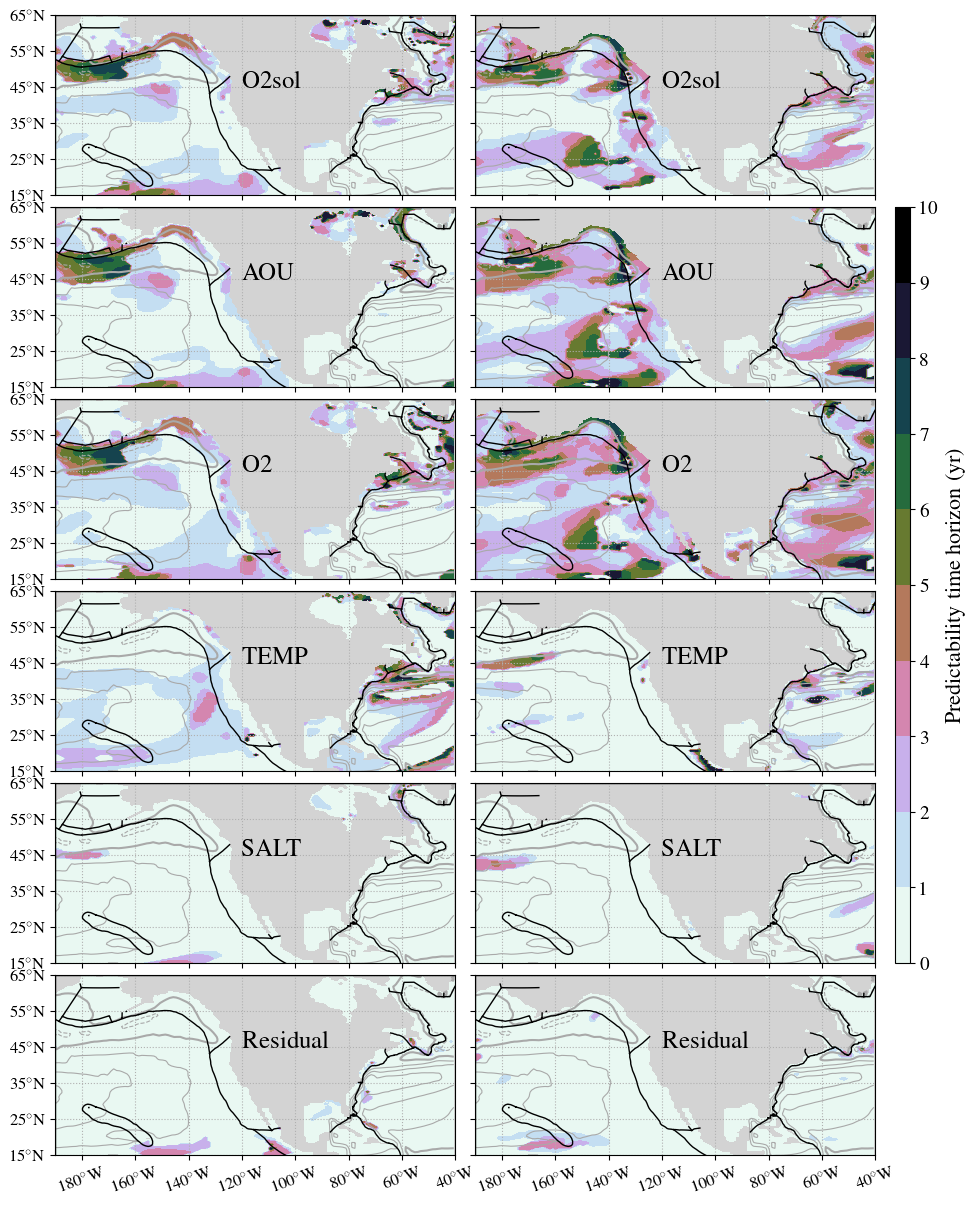

In [15]:
ngg = [['a', 'f', 'k'],\
       ['b', 'g', 'l'],\
       ['c', 'h', 'm'],\
       ['d', 'i', 'n'],\
       ['e', 'j', 'o']]
#
datadir = f'/glade/scratch/{USER}/DPLE-results'
nphi = 2
fig = plt.figure(figsize=[10, 12])
gs = gridspec.GridSpec(6, 2)
for tt,varr in zip(range(6),['Residual','SALT','TEMP','O2','AOU','O2sol']):
    print(varr)
    for hh,layer in [[0,layer1], [1,layer2]]:
        print(layer)
        # read ACC data
        # Persistence and DPLE ACC
        filename = f'{datadir}/DPLE_spatial_persistence_DPLE_ACC_{var}_components_{varr}_{layer}_leadyear1-10_new_method2.nc'
        ds_fore = xr.open_dataset(filename)
        corr_p = ds_fore['corr_p'].values[nphi, :]
        rcri_p = ds_fore['rcri_p'].values[nphi, :]
        corr_d = ds_fore['corr_d'].values[nphi, :]
        rcri_d = ds_fore['rcri_d'].values[nphi, :]
        corr13 = ds_fore['corr13'].values[nphi, :]
        rcri13 = ds_fore['rcri13'].values[nphi, :]
        nmae_p = ds_fore['nmae_p'].values[nphi, :]
        nmae_d = ds_fore['nmae_d'].values[nphi, :]
        lon = ds_fore['lon'].values
        lat = ds_fore['lat'].values
        #
        corr_p = mask_nan(corr_p);rcri_p = mask_nan(rcri_p)
        corr_d = mask_nan(corr_d);rcri_d = mask_nan(rcri_d)
        corr13 = mask_nan(corr13);rcri13 = mask_nan(rcri13)
        nmae_p = mask_nan(nmae_p);nmae_d = mask_nan(nmae_d)
        #
        corr_f = corr_d - corr_p
        nmae_f = nmae_p - nmae_d
        #
        pmask = corr_p >= rcri_p
        # Test ACC difference significance
        lenn = 2007+1-1954
        t_cr, p_cr = corrstats.dependent_corr(corr_p, corr_d, corr13, lenn-1, twotailed=False, method='steiger')
        #
        alpha = 0.05
        smask = p_cr <= alpha
        maskk = corr_d >= rcri_d
        nmask = nmae_d < 1.
        maskp = corr_f > 0.
        maskk = ~(~maskk + ~nmask)
        # calculate the longest predictable lead year
        nnld,nnla,nnlo = np.shape(corr_d)
        timeho = np.ma.zeros([nnla,nnlo])
        timeho.mask = True
        #
        for uu in range(nnla):
            for vv in range(nnlo):
                if corr_d.mask[0,uu,vv]==False:
                    ndd = np.where(maskk[:,uu,vv]==False)[0]
                    if len(ndd) != 0:
                        timeho[uu,vv] = np.min(ndd)
                    else:
                        timeho[uu,vv] = 0
        ## plot
        #ax = fig.add_subplot(gs[hh])
        ax = fig.add_axes([0.07+hh*0.42,0.04+tt*0.16,0.40,0.15])
        xrr = np.arange(lon_min-10, lon_max+10)
        ax.fill_between(xrr, np.ones(len(xrr))*(lat_min-10), np.ones(len(xrr))*(lat_max+10), color='lightgray')
        for pp in range(len(lon0)):
            ax.plot(lon0[pp], lat0[pp], color='k', linewidth=1., zorder=19)
        ax.contour(lon, lat, bsf, [-10], linestyles='dashed', colors='darkgray', linewidths=.8)
        ax.contour(lon, lat, bsf, [0], linestyles='solid', colors='darkgray', linewidths=1.5)
        ax.contour(lon, lat, bsf, [10, 20, 30, 40], linestyles='solid', colors='darkgray', linewidths=.8)
        #
        cd = ax.contourf(lon, lat, timeho, vct, shading='nearest', cmap=new_cmapt, norm=pal_normt)
        #
        ax.set_xlim(lon_min, lon_max)
        ax.set_ylim(lat_min, lat_max)
        ax.set_xticks(np.arange(-180, -30, 20))
        ax.set_yticks(np.arange(15, 66, 10))
    #
        #ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4,zorder=20)
    #if gg == 0:
        ax.text(-120, 45, varr, fontsize=18, fontweight='bold')
    #
        xtl = []
        for ii in np.arange(-180, -30, 20):
            if ii < -180:
                ii = ii + 360
                ff = 'E'
            elif ii >= -180:
                ff = 'W'
            elif np.abs(ii-0) < 1e-5:
                ff = ''
            xtl.append('%d$^\circ$%s' % (abs(ii), ff))
        ytl = []
        for jj in np.arange(15, 66, 10):
            if jj < 0:
                ff = 'S'
            elif jj > 0:
                ff = 'N'
            elif np.abs(jj-0) < 1e-5:
                ff = ''
            ytl.append('%d$^\circ$%s' % (abs(jj), ff))
        if tt == 0:
            ax.set_xticklabels(xtl, fontsize=12, fontweight='bold', rotation=20)
        else:
            ax.set_xticklabels([], fontsize=12, fontweight='bold', rotation=20)
        if hh == 0:
            ax.set_yticklabels(ytl, fontsize=12, fontweight='bold')
        else:
            ax.set_yticklabels([], fontsize=12, fontweight='bold')
        ax.plot([lon_min, lon_max], [lat_max, lat_max], color='k', linewidth=1, zorder=10)
        ax.plot([lon_min, lon_min], [lat_min, lat_max], color='k', linewidth=1, zorder=10)
        ax.grid(linestyle='dotted', zorder=11)
# colorbar     
cbaxes = fig.add_axes([0.91, 0.2, 0.015, 0.63])
cb = plt.colorbar(cd, orientation="vertical", label='ACC', cax=cbaxes, extend='min', ticks=[0,1,2,3,4,5,6,7,8,9,10])
cb.ax.tick_params(labelsize=14)
cb.set_label(label='Predictability time horizon (yr)', fontsize=16, fontweight='bold')
#plt.tight_layout()
#
output = f'/glade/scratch/{USER}/DPLE-plots'
outfile = f'{output}/DPLE_{var}_components_all_time_horizon_spatial_{nphi}_{layer1}_{layer2}.png'
plt.savefig(outfile, dpi=400)
plt.show()